# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)


## Introduction/Background

I have decided on using the PolitiFact fact checking dataset from Rishabh Misra on kaggle. To start off, PolitiFact is a fact checking website that is popular in the United States as a way to know if a certain politician is quoted as telling the truth or not. In this specific dataset, there are 21,152 statements by US politicians that have been fact checked by experts and are catergorized into 6 categories: true, mostly true, half true, mostly false, and false, which are the categories that PolitiFact uses in general. My goal with this dataset is to be able to train a model that can be used to read a statement made by someone, which based off the language being used in the statements would mostly work for politcians, and be able to sort it into a category of true or false. At first I would try and just get as much efficacy as possible to place true, mostly true, and half true into the True section, and vice versa for the false section. Once that has been achieved, I would then try and move on to put them into their own categories, instead of broadly assigning mostle true and half true into a fully True category. I would also like to answer these questions: Do the sources of the false facts have a temporal pattern? Is there a linguistic pattern in the false facts that makes them appear false?

Hopefully by the end of the semester I will have answered these questions, along with the sorting of true and false statements. 

 > 1. Misra, Rishabh and Jigyasa Grover. "Do Not ‘Fake It Till You Make It’! Synopsis of Trending Fake News Detection Methodologies Using Deep Learning." Deep Learning for Social Media Data Analytics (2022).
 > 2. Misra, Rishabh. "Politifact Fact Check Dataset." DOI: 10.13140/RG.2.2.29923.22566 (2022).

In [58]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize



df = pd.read_json("../input/politifact-fact-check-dataset/politifact_factcheck_data.json", lines=True)
df.head()

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...


In [59]:
#checking the amount of rows in the data
len(df)


21152

In [60]:
#checking the amount of statement_originators in the data set to see where most of the statements come from, and it's honestly kind of funny how most are from Trump when we had 4 years of him and 8 years of Obama (side note I do not like trump)
#especially considering it's from 2008 to 2022
df['statement_originator'].value_counts()

Facebook posts       1914
Donald Trump          950
Viral image           916
Bloggers              717
Barack Obama          563
                     ... 
Ja'Mal Green            1
Viral Politics US       1
Jason Haas              1
Simone Gold             1
Project Veritas         1
Name: statement_originator, Length: 4565, dtype: int64

I am just going to go ahead and remove some of the lower numbered statement originators from the pool.

It could be useful, but as a large amount are from more prominent politicians, I am just going to go off of that.

I'll start by doing something simple like 5, and if it becomes an issue I will change it.

In [61]:

df = df[df.groupby('statement_originator')["statement_originator"].transform('size') >= 5]
df['statement_originator'].value_counts()

Facebook posts    1914
Donald Trump       950
Viral image        916
Bloggers           717
Barack Obama       563
                  ... 
Brian Robinson       5
Jorge Ramos          5
AFL-CIO              5
Megyn Kelly          5
Dave Aronberg        5
Name: statement_originator, Length: 587, dtype: int64

Okay so it appears that there are an incredible amount of statement_originators that are less than 5. The dataset went fron 4656 statement_orignators to 161, impressive amount of fact checking for that many people.
I guess what I want to do now is clean up the actual quotes by removing puncuation and special characters.


In [62]:
df['statement'].head()

0    John McCain opposed bankruptcy protections for...
1    "Bennie Thompson actively cheer-led riots in t...
2    Says Maggie Hassan was "out of state on 30 day...
3    "BUSTED: CDC Inflated COVID Numbers, Accused o...
4    "I'm the only (Republican) candidate that has ...
Name: statement, dtype: object

The next step for me is to remove the special characters and puncuation, as it won't be helpful to me to determine if the statements are false/true/kinda true/kinda false/etc 


In [63]:
df['statement'] = df['statement'].astype(str)
df = df[~df["statement"].isnull()]
#delete special characters
def clean(json):
    txt = json.str.replace("()", "")
    txt = json.str.replace('(<a).*(>).*()', '')
    txt = json.str.replace('(&amp)', '')
    txt = json.str.replace('(&gt)', '')
    txt = json.str.replace('(&lt)', '')
    txt = json.str.replace('(\xa0)', ' ')  
    return json.df['statement'] == clean(df['statement'])

df['statement1'] = df['statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['statement1'].head()
     

0    john mccain opposed bankruptcy protections for...
1    "bennie thompson actively cheer-led riots in t...
2    says maggie hassan was "out of state on 30 day...
3    "busted: cdc inflated covid numbers, accused o...
4    "i'm the only (republican) candidate that has ...
Name: statement1, dtype: object

In [64]:
#now that we have statement1, I will remove the puncuation. 
df['statement1'] = df['statement1'].str.replace('[^\w\s]', '', regex=True)
df['statement1'].head()

0    john mccain opposed bankruptcy protections for...
1    bennie thompson actively cheerled riots in the...
2    says maggie hassan was out of state on 30 days...
3    busted cdc inflated covid numbers accused of v...
4    im the only republican candidate that has actu...
Name: statement1, dtype: object

Now to remove the stopwords so the statement1 is less clogged with useless words.

In [65]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['statement1'] = df['statement1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['statement1'].head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    john mccain opposed bankruptcy protections fam...
1          bennie thompson actively cheerled riots 90s
2    says maggie hassan state 30 days last three mo...
3    busted cdc inflated covid numbers accused viol...
4    im republican candidate actually reduced size ...
Name: statement1, dtype: object

Now to remove the rare words, this could be problematic if names of certain politcians becomes important, but I doubt it.

In [66]:
freq = pd.Series(' '.join(df['statement1']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
print(less_freq[:100])


['poop', 'servants', 'pinned', 'leone', 'gofundme', 'usd', 'hrc', 'hollywoods', 'walsh', 'jeeps', 'unsuccessfully', 'steakhouses', 'klansmen', 'swedish', 'associations', 'matrix', 'marxism', '33200', 'looney', 'ravine', 'pediatricians', 'fareed', 'priced', 'proclaimed', 'comrade', 'minerals', 'fondness', 'prejudged', 'mortally', '2028', 'bilingual', 'wmds', 'feasible', 'cigarette', 'blair', 'antisemitism', 'interrogations', 'heartland', 'captain', 'terminator', 'highfive', 'tenet', 'txdems', 'slavelike', 'raeses', 'admiral', 'pardon', 'proximity', 'gravy', 'antidepressants', 'fearmongering', 'classify', 'antiisrael', 'snorted', 'kentuckys', 'stuffing', 'statesa', 'budge', 'aisle', 'verbatim', 'ramming', 'boccieris', 'awfully', '9999', 'signals', 'thirdgrade', 'seton', 'pristine', 'note', 'pantry', 'minecraft', 'overincarceration', 'stainless', 'attire', 'bh', 'tn04', 'desjarlaiss', 'hazard', 'replicas', 'butlers', 'grapefruit', 'copper', 'indebtedness', '111', 'nonaffiliation', 'retrea

You know what? I'm not removing these for now. 

*I tried to stem and lemmatize and it went horribly wrong so I'll skip that for now.*

Now we start the data analysis

In [73]:
from textblob import TextBlob

df['statement_len'] = df['statement'].astype(str).apply(len)
df['word_count'] = df['statement'].apply(lambda x: len(str(x).split()))
df['polarity'] = df['statement1'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link,statement1,statement_len,word_count,polarity
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...,john mccain opposed bankruptcy protections fam...,132,19,0.000000
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...,bennie thompson actively cheerled riots 90s,55,8,-0.133333
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...,says maggie hassan state 30 days last three mo...,76,15,0.000000
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...,busted cdc inflated covid numbers accused viol...,70,10,0.000000
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...,im republican candidate actually reduced size ...,87,13,0.000000


Now to take that polarity and compare it with the word count and statement_length

array([[<AxesSubplot:title={'center':'statement_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

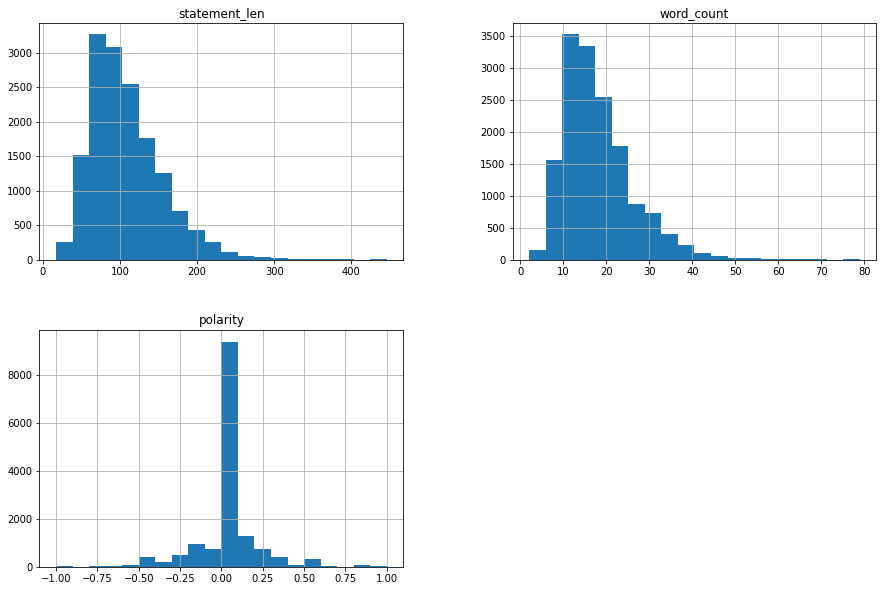

In [74]:
df[["statement_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

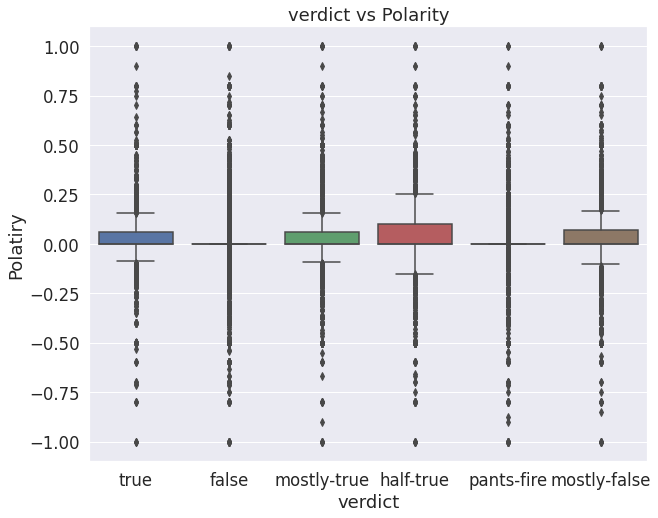

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'verdict', y = 'polarity', data = df)
plt.xlabel("verdict")
plt.ylabel("Polatiry")
plt.title("verdict vs Polarity")
plt.show()

So it appears that anything that involves a statement being even the smallest amount of true possible with mostly-false, that the polarity is the highest with true statements. False statements as it's own category has no polarity whatsoever, so that's something. 

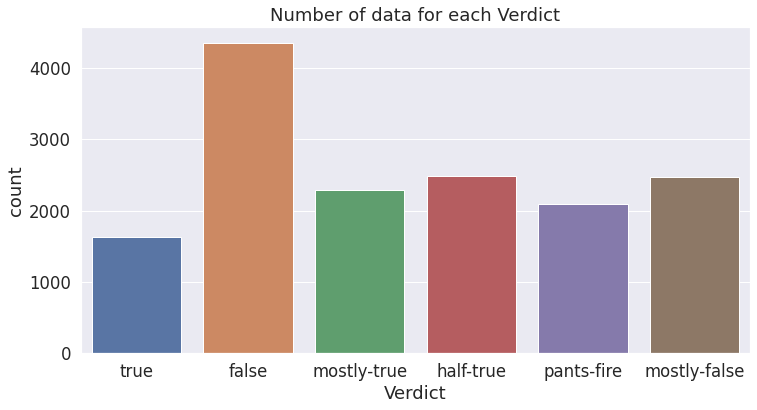

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='verdict', data=df)
plt.xlabel("Verdict")
plt.title("Number of data for each Verdict")
plt.show()

There are many more false statements than true statements, which is a little sad but makes sense as if you're getting fact checked there is a good chance you said something wrong. Even mostly true and half true involve little lies, so there are an incredible amount of liars that run the country. 

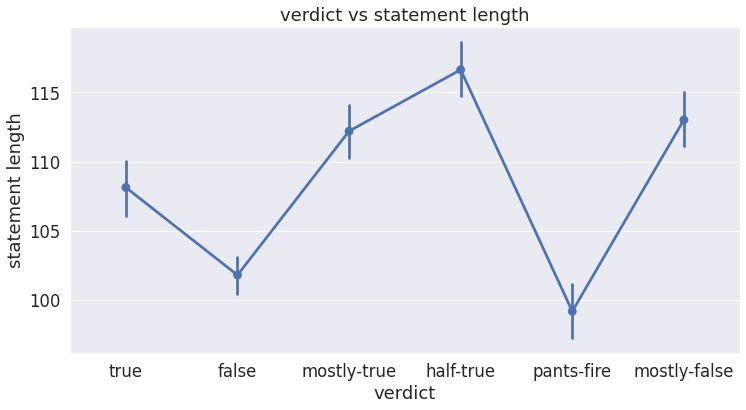

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.pointplot(x = "verdict", y = "statement_len", data = df)
plt.xlabel("verdict")
plt.ylabel("statement length")
plt.title("verdict vs statement length")
plt.show()

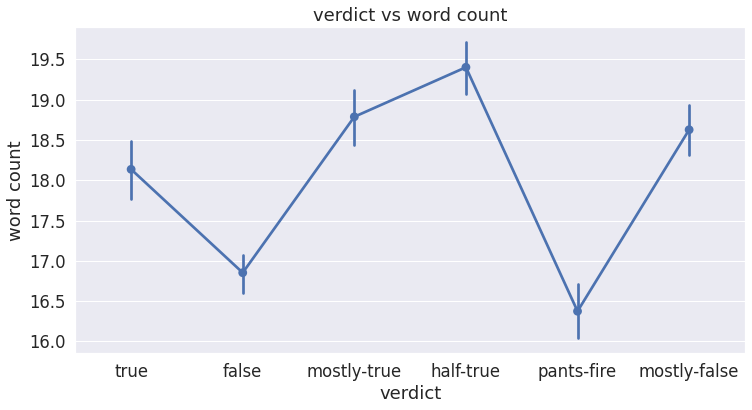

In [83]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.pointplot(x = "verdict", y = "word_count", data = df)
plt.xlabel("verdict")
plt.ylabel("word count")
plt.title("verdict vs word count")
plt.show()

No surprise that these graphs look the exact same, don't trust a politician who speaks in short sentences I suppose. Based off of this, the shorter the statement the more someone is lying, which false being that low for word count and length is interesting as false has the most verdicts by far, so most false verdicts are shorter statements in general. 

**There was one thing I wanted to try but I could not figure out, but I wanted to see the verdict and how it corresponded to the source, but I don't know how to get a graph to do that.**